
<br>

*Elaborado por Daniel Salmoran* <br> *Economista*

<br>



# 2. Análisis simultáneo de varios tickers de distinta clase: <br> **forex, bonds, indexes & stocks.**

## En este apartado se muestra la forma de acceder a los **precio** de varios instrumentos financieros que están disponibles en la página de [Yahoo Finance](https://finance.yahoo.com/markets/). Por ejemplo, se puede consultar el Tipo de Cambio Peso Mexicano/Dólar estadounidense ([MXN=X](https://finance.yahoo.com/quote/MXN=X/)), entre otras divisas; el precio promedio de las Notas del Tesoro de Estados Unidos a 10 años ([^TNX](https://finance.yahoo.com/quote/%5ETNX/)); valor de los índices como el S&P500 ([^GSPC](https://finance.yahoo.com/quote/%5EGSPC/)) o Nasdaq Composite ([^IXIC](https://finance.yahoo.com/quote/%5EIXIC/)); además del precio de cierre de varias acciones como [APPL](https://finance.yahoo.com/quote/AAPL/), [AMZN](https://finance.yahoo.com/quote/AMZN/) o [TSLA](https://finance.yahoo.com/quote/TSLA/).

## Al final de este apartado se utiliza la librería **[matplotlib](https://matplotlib.org/stable/index.html)** para realizar gráficas de varios instrumentos que cotizan en bolsa.

<br>

---

<br>

Para instalar/actualizar las paqueterías se puede usar:


In [ ]:
!pip install yfinance
!pip install matplotlib

!pip install --upgrade yfinance
!pip install --upgrade matplotlib

<br>

Importamos las librerías con nombres abreviados:

In [2]:
import pandas as pd
import numpy as np
import yfinance as yf

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
from matplotlib.ticker import PercentFormatter

<br>

Declaramos las listas con los [ticker](https://www.investopedia.com/ask/answers/12/what-is-a-stock-ticker.asp) de los instrumentos a analizar. Pueden consultar las listas completas de [divisas](https://finance.yahoo.com/markets/currencies/), [bonos](https://finance.yahoo.com/markets/bonds/), [índices](https://finance.yahoo.com/markets/world-indices/) y [acciones](https://finance.yahoo.com/markets/stocks/most-active/) en [Yahoo Finance](https://finance.yahoo.com/).

In [3]:
#listas con los ticker reconocidos en YFinance
forex= ["MXN=X", "JPYUSD=X", "CNYUSD=X", "EURUSD=X", "USDCHF=X"]
bonds= ["^TNX",  "^FVX", "^IRX"]
index= ["^GSPC", "^IXIC", "^DJI", "^RUT"] #, "^N225", "000001.SS", "^HSI","^FTSE", "^GDAXI", "^STOXX50E"]
stocks= ["AMZN", "NVO", "META", "HOOD"]

<br>

Podemos obtener el precio de cierre de cada elemento presente en la lista de instrumentos seleccionada al combinar el ciclo for con el método [history](https://yfinance-python.org/reference/api/yfinance.Ticker.history.html) de la clase [Ticker](https://yfinance-python.org/reference/api/yfinance.Ticker.html) de la paquetería [yfinance](https://yfinance-python.org/reference/index.html):

In [4]:
#declaramos el dataframe en el que almacenamos los datos
data= pd.DataFrame()

#obtenemos la informacion con la libreria yfinance
for i in stocks:     #IMPORTANTE: Seleccionar la lista de instrumentos a analizar
    rawdata= yf.Ticker(i).history(period= '1y')
    data[i]= rawdata["Close"]     #Los datos "Close" son los datos de cierre ajustados

#removemos el componente time-zone de la fecha que entrega yfinance
data.index = data.index.tz_localize(None)

#definimos el formato de fecha en los datos del indice de la tabla
data.index = pd.to_datetime(data.index, format= '%Y-m%-d% %H:%M:%S')

#cambiamos el nombre del indice, antes: Date, ahora: Fecha
data.index.name = 'Fecha'

<br>

Para visualizar el contenido llamamos a la variable:

In [5]:
#resultado
data

,AMZN,NVO,META,HOOD
Fecha,,,,
2024-05-03,186.210007,120.647026,450.317169,17.950001
2024-05-06,188.699997,122.156952,463.987335,17.780001
2024-05-07,188.759995,124.804222,466.538025,17.990000
2024-05-08,188.000000,124.215942,470.882172,17.850000
2024-05-09,189.500000,126.147476,473.691925,17.299999
...,...,...,...,...
2025-04-28,187.699997,62.619999,549.739990,48.930000
2025-04-29,187.389999,65.160004,554.440002,49.369999
2025-04-30,184.419998,66.449997,549.000000,49.110001


<br>

Si a partir de este punto se prefiere continuar trabajando desde Excel, la línea de código para descargar el pd.DataFrame es:

In [6]:
#linea de codigo para descargar el DataFrame como archivo excel
data.to_excel('precios_de_cierre.xlsx')

<br>

En los siguientes pasos vamos a calcular el rendimiento diario y acumulado del desempeño de los instrumentos financieros seleccionados para finalmente graficar los resultados.

<br>

El rendimiento diario se puede calcular como se muestra a continuación:

In [7]:
#rendimiento aritmetico:
rendimientos = round(((data/data.shift(1))-1), 4)

#rendimiento logaritmico:
rendimientos= round(np.log(data/data.shift(1)), 4)

<br>

Revisamos el resultado:

In [8]:
rendimientos

,AMZN,NVO,META,HOOD
Fecha,,,,
2024-05-03,NaN,NaN,NaN,NaN
2024-05-06,0.0133,0.0124,0.0299,-0.0095
2024-05-07,0.0003,0.0214,0.0055,0.0117
2024-05-08,-0.0040,-0.0047,0.0093,-0.0078
2024-05-09,0.0079,0.0154,0.0059,-0.0313
...,...,...,...,...
2025-04-28,-0.0068,0.0087,0.0045,-0.0106
2025-04-29,-0.0017,0.0398,0.0085,0.0090
2025-04-30,-0.0160,0.0196,-0.0099,-0.0053


Sustituimos los valores NaN por Ceros para hacer coincidir en la grafica el punto de partida del análisis

In [9]:
#cambiamos los datos NaN por ceros
rendimientos.fillna(value=0, inplace=True)

<br>

Volvemos a revisar el resultado:

In [10]:
rendimientos

,AMZN,NVO,META,HOOD
Fecha,,,,
2024-05-03,0.0000,0.0000,0.0000,0.0000
2024-05-06,0.0133,0.0124,0.0299,-0.0095
2024-05-07,0.0003,0.0214,0.0055,0.0117
2024-05-08,-0.0040,-0.0047,0.0093,-0.0078
2024-05-09,0.0079,0.0154,0.0059,-0.0313
...,...,...,...,...
2025-04-28,-0.0068,0.0087,0.0045,-0.0106
2025-04-29,-0.0017,0.0398,0.0085,0.0090
2025-04-30,-0.0160,0.0196,-0.0099,-0.0053


<br>

Si se prefiere continuar trabajando desde Excel, se puede descargar el pd.DataFrame con:

In [11]:
#pd.DataFrame(
rendimientos.to_excel('rendimientos_diarios.xlsx')

<br>

Determinamos los rendimientos acumulados:

In [12]:
#utilizamos la funcion cumsum de Numpy
rendimientos_acc = np.cumsum(rendimientos)

#linea de codigo para descargar el pd.DataFrame como archivo excel:
rendimientos_acc.to_excel('rendimientos_acumulados.xlsx')

#resultado
rendimientos_acc

,AMZN,NVO,META,HOOD
Fecha,,,,
2024-05-03,0.0000,0.0000,0.0000,0.0000
2024-05-06,0.0133,0.0124,0.0299,-0.0095
2024-05-07,0.0136,0.0338,0.0354,0.0022
2024-05-08,0.0096,0.0291,0.0447,-0.0056
2024-05-09,0.0175,0.0445,0.0506,-0.0369
...,...,...,...,...
2025-04-28,0.0084,-0.6557,0.1994,1.0028
2025-04-29,0.0067,-0.6159,0.2079,1.0118
2025-04-30,-0.0093,-0.5963,0.1980,1.0065


<br>

Por último, se pueden graficar los precios de cotización de los distintos instrumentos seleccionados haciendo uso de la librería **matplotlib**. Para conocer las características y detalles de personalización de las gráficas, pueden hacer click [aquí](https://matplotlib.org/stable/users/explain/quick_start.html). <br>

A continuación se muestra el código de la *Gráfica* de líneas que muestra el comportamiento de los instrumentos financieros seleccionados:

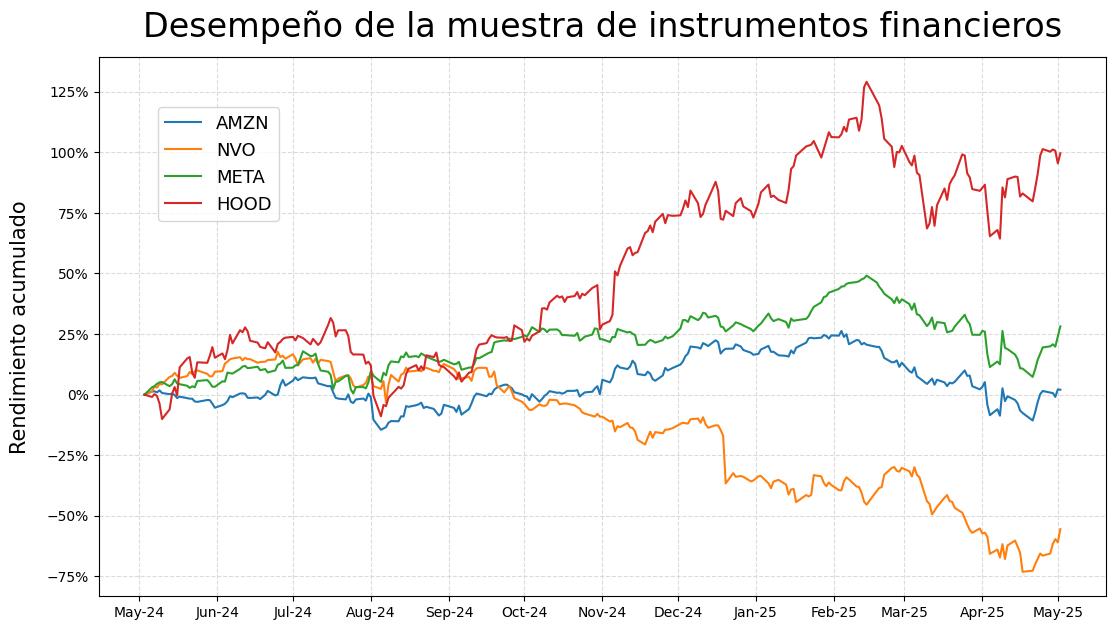

In [13]:
#declaramos las dimenciones de la figura
plt.figure(figsize=(13, 7))

#itineramos por cada elemento para trazar su linea
for ticker in data.columns:
    plt.plot(data.index, rendimientos_acc[ticker]*100, label= ticker)

#diseño de la grafica
#plt.xlabel('Fecha', fontsize=15, labelpad=25)
plt.ylabel('Rendimiento acumulado', fontsize=15, labelpad=12)
plt.title('Desempeño de la muestra de instrumentos financieros', fontsize=24, pad=15)
plt.grid(True, linestyle= '--', color= 'lightgrey', alpha= 0.8)


#en caso de querer rotar las etiquetas:
#plt.xticks(rotation= 90)

#incluimos la leyenda
plt.legend(loc='lower left', bbox_to_anchor=(0.050, 0.68), fontsize=13)

#damos el formato de mes y año en el eje x
plt.gca().xaxis.set_major_formatter(DateFormatter('%b-%y'))

#definimos la localizacion de las etiquetas del eje x
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))

#establesemos el formato de porcentaje al eje y
plt.gca().yaxis.set_major_formatter(PercentFormatter())

#linea de codigo para descargar la grafica como archivo .png es:
#plt.savefig('figura1.png', dpi=300, bbox_inches='tight', transparent=False)

#resultado
plt.show()
